In [3]:
!pip install opencv-python

  Using cached opencv_python-4.5.3.56-cp36-cp36m-win_amd64.whl (34.9 MB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tqdm import tqdm
import sys

"""Make two groups according to class labels (Malignant and Benign)"""

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  
import helpers

def get_data(path):
    img=cv2.imread(path)
    return img


# Training file directory
DATASET = os.path.join(ROOT_DIR, 'dataset')

helpers.create_directory("{}/isic2016gan/".format(DATASET))
NEW_DATASET_PATH = "{}/{}".format(DATASET, "isic2016gan")
NEW_DATASET_PATH

helpers.create_directory("{}/testA".format(NEW_DATASET_PATH))
helpers.create_directory("{}/testB".format(NEW_DATASET_PATH))


# Learn mapping from normal lesions to maligant lesions
NORMAL_FOLDER = "{}/testA/".format(NEW_DATASET_PATH)
CANCER_FOLDER = "{}/testB/".format(NEW_DATASET_PATH)

CANCER_FOLDER, NORMAL_FOLDER


# IMAGES PATH
TRAINING_IMAGES = os.path.join(DATASET, 'isic2016', 'ISBI2016_ISIC_Part3_Test_Data')
# GROUND TRUTH PATH
TRAINING_GT = os.path.join(DATASET, 'isic2016', 'ISBI2016_ISIC_Part3_Test_GroundTruth.csv')
# Read the metadata
TRAINING_META = pd.read_csv(TRAINING_GT, sep=',', names=["FILENAME", "CLASS"])

# filenames and gts
filenames = TRAINING_META['FILENAME'].values
gt = TRAINING_META['CLASS'].values
    
# convert string labels to numeric values
labels = []
for s in gt:
    if s == "benign" or s == 0.0 :
        labels.append(0)
    if s == "malignant" or s == 1.0:
        labels.append(1)

# save in folders
number = 0  
for f, l in tqdm(zip(filenames[:], labels[:])):
    f = "{}/{}.jpg".format(TRAINING_IMAGES, f)
    img = get_data(f)
    
    if l == 0.0:
            cv2.imwrite(NORMAL_FOLDER + str(number) + ".jpeg", img)
            img=None
    else:
        cv2.imwrite(CANCER_FOLDER + str(number) + ".jpeg", img)
        img=None
    number+=1

print("Done!")

In [3]:
benign=727
malignant=173


C:\Anaconda\envs\GPU_Keras\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
C:\Anaconda\envs\GPU_Keras\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


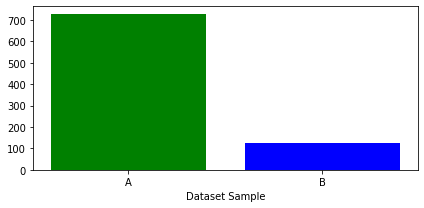

In [41]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [727, 123]
bars = ('A', 'B')
x_pos = np.arange(len(bars))

# Create bars with different colors
fig = plt.figure(figsize = (6, 3))
plt.bar(x_pos, height, color=[ 'green', 'blue'])

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.xlabel("Dataset Sample")
fig.tight_layout()
# save graph
plt.savefig('hello', dpi=70, facecolor='w', edgecolor='w',papertype=None, format=None,
        transparent=False,
        frameon=None, metadata=None)
# plt.savefig("dataset")

# Show graph
plt.show()

In [42]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [44]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

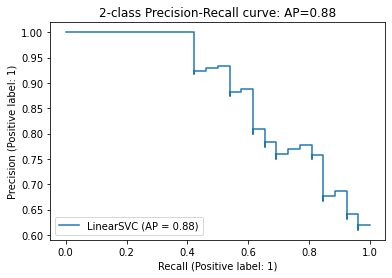

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))